<a href="https://colab.research.google.com/github/Sudheer-cpu93/Restaurant-Recommendation-System/blob/main/Restraunt_recc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/zomato (3).csv", encoding='latin-1')

In [ ]:
# Display basic info
print("Dataset Information:")
data.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  

In [ ]:
# Select relevant columns for clustering
selected_columns = data[['Latitude', 'Longitude', 'Average Cost for two', 'Aggregate rating', 'Votes']]
print("\nSelected Columns for Clustering:")
print(selected_columns.head())


Selected Columns for Clustering:
    Latitude   Longitude  Average Cost for two  Aggregate rating  Votes
0  14.565443  121.027535                  1100               4.8    314
1  14.553708  121.014101                  1200               4.5    591
2  14.581404  121.056831                  4000               4.4    270
3  14.585318  121.056475                  1500               4.9    365
4  14.584450  121.057508                  1500               4.8    229


In [ ]:
# Handle missing values if any
selected_columns.fillna(selected_columns.mean(), inplace=True)

<ipython-input-14-7d62cb504de9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns.fillna(selected_columns.mean(), inplace=True)


In [ ]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_columns)


In [ ]:
# Find optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

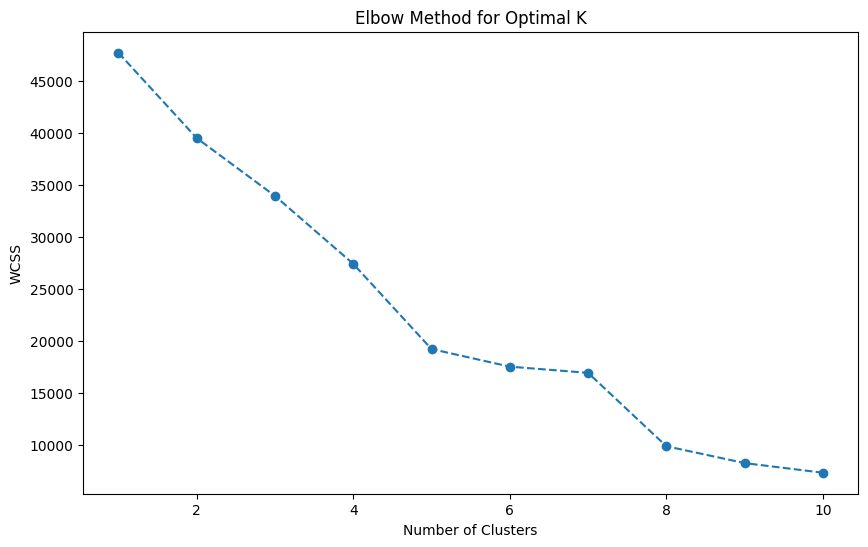

In [ ]:
# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Fit K-Means with optimal number of clusters (e.g., 4)
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_data)

In [ ]:
# Add cluster labels to the original dataset
data['Cluster'] = clusters


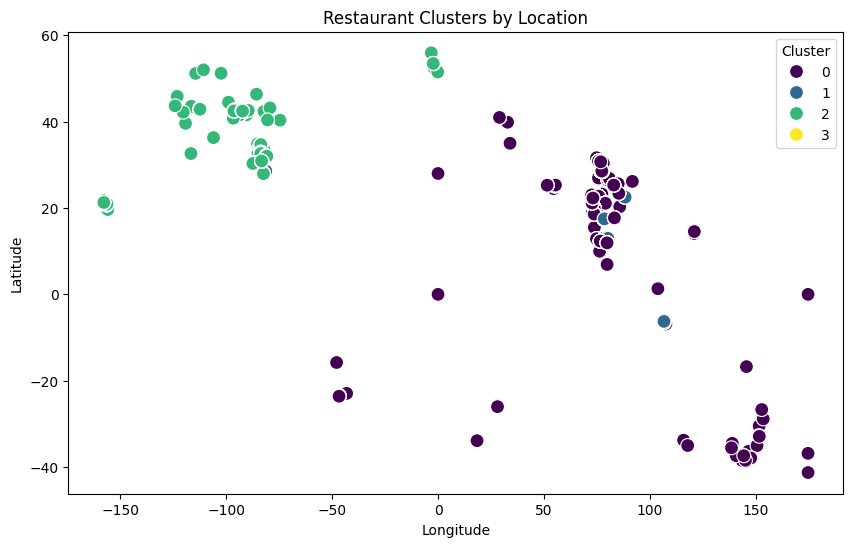

In [ ]:
# Visualize clusters based on geographical coordinates
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data['Longitude'], y=data['Latitude'],
    hue=data['Cluster'], palette='viridis', s=100
)
plt.title('Restaurant Clusters by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# Evaluate clustering performance using Silhouette Score
sil_score = silhouette_score(scaled_data, clusters)
print(f"Silhouette Score: {sil_score:.2f}")

Silhouette Score: 0.63


In [ ]:
# Recommend restaurants from the same cluster
def recommend_restaurants(user_lat, user_long, num_recommendations=5):
    """Recommend top restaurants based on user's location and cluster."""
    user_cluster = kmeans.predict(scaler.transform([[user_lat, user_long, 0, 0, 0]]))[0]
    print(f"\nUser is in Cluster: {user_cluster}")

    recommendations = data[data['Cluster'] == user_cluster].sort_values(
        by='Aggregate rating', ascending=False).head(num_recommendations)
    return recommendations[['Restaurant Name', 'City', 'Cuisines', 'Aggregate rating', 'Votes']]

In [ ]:
# Example: Recommend restaurants for a user in a specific location
user_lat = 14.565443  # Example Latitude
user_long = 121.027535  # Example Longitude
recommendations = recommend_restaurants(user_lat, user_long)
print("\nTop Restaurant Recommendations:")
print(recommendations)


User is in Cluster: 0

Top Restaurant Recommendations:
                               Restaurant Name            City  \
8     Spiral - Sofitel Philippine Plaza Manila      Pasay City   
9262                           Barbeque Nation           Vizag   
50                           Garota de Ipanema  Rio de Janeiro   
48                          Braseiro da Gíçvea  Rio de Janeiro   
39                                  Coco Bambu       Brasí_lia   

                                  Cuisines  Aggregate rating  Votes  
8                  European, Asian, Indian               4.9    621  
9262  North Indian, Chinese, Mediterranean               4.9    345  
50                     Brazilian, Bar Food               4.9     49  
48                     Brazilian, Bar Food               4.9     40  
39                           International               4.9     30  


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
